In [2]:
import yfinance as yf
import pandas as pd
from curl_cffi import requests

In [ ]:
session = requests.Session(impersonate="chrome")

# Download Dow Jones index data
dow_jones_data = yf.download('^DJI', start='2008-01-01', end='2024-01-01', session=session)
dow_jones_data = dow_jones_data.xs('^DJI', axis=1, level=1)

[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2008-01-02  13043.959961  13279.540039  12991.370117  13261.820312  239580000
2008-01-03  13056.719727  13137.929688  13023.559570  13044.120117  200620000
2008-01-04  12800.179688  13046.719727  12789.040039  13046.559570  304210000
2008-01-07  12827.490234  12884.150391  12733.839844  12801.150391  306700000
2008-01-08  12589.070312  12906.419922  12565.410156  12820.900391  322690000


In [19]:
dow_jones_data_processed = dow_jones_data.reset_index().rename(
    columns={
        "Date": "date",
        "Adj Close": "adjcp",
        "Close": "close",
        "High": "high",
        "Low": "low",
        "Volume": "volume",
        "Open": "open",
        "tic": "tic",
    })

In [21]:
dow_jones_data_processed.to_csv('data/dow_jones_data.csv', index=True)

In [7]:
baseline_df = pd.read_csv('data/dow_jones_data.csv')
baseline_df

,Unnamed: 0,date,close,high,low,open,volume
0,0,2008-01-02,13043.959961,13279.540039,12991.370117,13261.820312,239580000
1,1,2008-01-03,13056.719727,13137.929688,13023.559570,13044.120117,200620000
2,2,2008-01-04,12800.179688,13046.719727,12789.040039,13046.559570,304210000
3,3,2008-01-07,12827.490234,12884.150391,12733.839844,12801.150391,306700000
4,4,2008-01-08,12589.070312,12906.419922,12565.410156,12820.900391,322690000
...,...,...,...,...,...,...,...
4022,4022,2023-12-22,37385.968750,37534.519531,37268.878906,37349.269531,252970000
4023,4023,2023-12-26,37545.328125,37617.988281,37371.828125,37405.898438,212420000
4024,4024,2023-12-27,37656.519531,37683.699219,37488.601562,37518.621094,245530000
4025,4025,2023-12-28,37710.101562,37778.851562,37650.980469,37661.519531,199550000


In [5]:
account_df = pd.read_csv('account_value.csv')
account_df

,account_value,date
0,99409.195,2020-09-14
1,99435.150,2020-09-15
2,99001.020,2020-09-16
3,98875.540,2020-09-17
4,101005.200,2020-09-18
...,...,...
261,105826.180,2021-09-27
262,105283.680,2021-09-28
263,105283.680,2021-09-29
264,105283.680,2021-09-30


In [10]:
filtered_baseline_df = baseline_df[baseline_df['date'].isin(account_df['date'])]

/tmp/ipykernel_3845452/1040356878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_baseline_df['date'] = pd.to_datetime(baseline_df['date'])


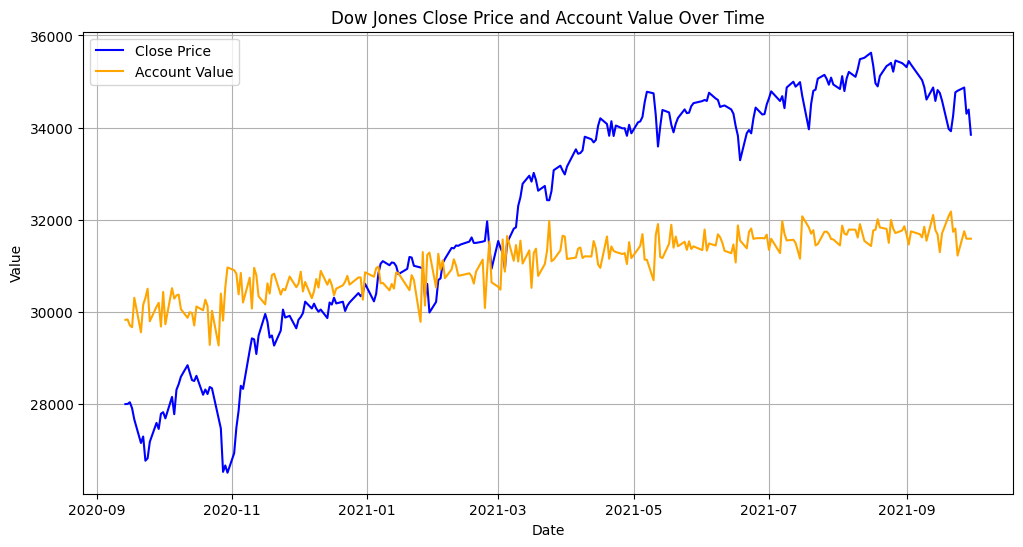

In [13]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime for better plotting
filtered_baseline_df['date'] = pd.to_datetime(baseline_df['date'])
account_df['date'] = pd.to_datetime(account_df['date'])

# Plot 'close' from baseline_df and 'account_value' from account_df against 'date'
plt.figure(figsize=(12, 6))
plt.plot(filtered_baseline_df['date'], filtered_baseline_df['close'], label='Close Price', color='blue')
plt.plot(account_df['date'], account_df['account_value'] * 0.3, label='Account Value', color='orange')
plt.title('Dow Jones Close Price and Account Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()